In [1]:
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [2]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Spotify/Spotify_API_csv/SpotifyAPI_Pop.csv')
#print(data)

# Train Test Split
train, test = sk.model_selection.train_test_split(data, test_size=0.2)

X_train = train.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
X_test = test.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
y_train = train['hit']
y_test = test['hit']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print(X_train.shape)

# Neural Network

In [4]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 13s 6ms/step - loss: 0.4210 - accuracy: 0.8357 - precision: 0.2333 - recall: 0.0054
Epoch 2/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4022 - accuracy: 0.8378 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/50
250/250 [==============================] - 2s 8ms/step - loss: 0.3867 - accuracy: 0.8394 - precision: 0.6970 - recall: 0.0177
Epoch 4/50
250/250 [==============================] - 3s 12ms/step - loss: 0.3708 - accuracy: 0.8416 - precision: 0.6099 - recall: 0.0663
Epoch 5/50
250/250 [==============================] - 2s 9ms/step - loss: 0.3536 - accuracy: 0.8495 - precision: 0.6911 - recall: 0.1310
Epoch 6/50
250/250 [==============================] - 3s 10ms/step - loss: 0.3335 - accuracy: 0.8556 - precision: 0.6765 - recall: 0.2111
Epoch 7/50
250/250 [==============================] - 1s 5ms/step - loss: 0.3131 - accuracy: 0.8665 - precision: 0.7106 - recall: 0.2989
Epoch 8/50
250/250 [==========

# Perforomance + Plot Graph 

In [5]:
predictions = model.predict(X_test_scaled)

prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

print(confusion_matrix(y_test, prediction_classes))

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.4f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.4f}')

63/63 [==============================] - 0s 2ms/step
[[1570  111]
 [  75  244]]
Accuracy: 0.9070
Precision: 0.6873
Recall: 0.7649


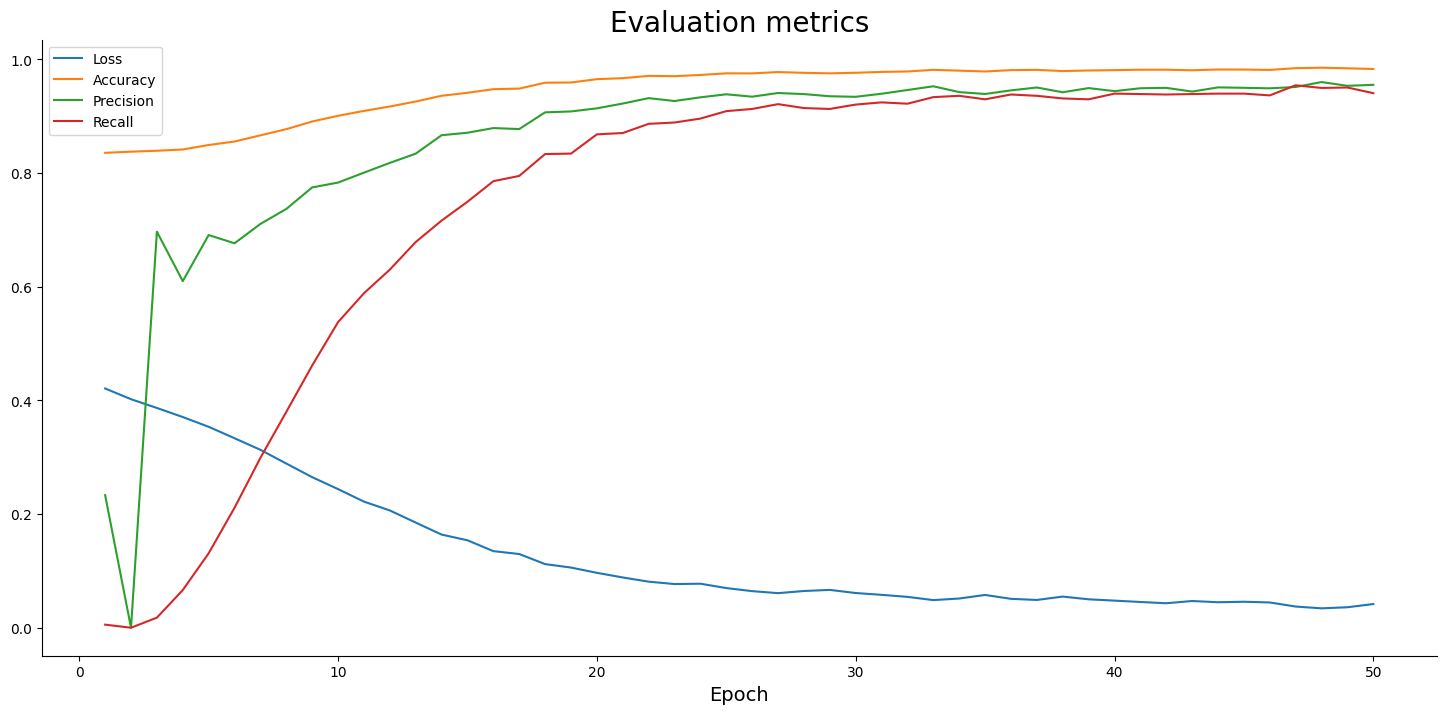

In [6]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

# Old

In [7]:
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
data = pd.read_csv('/content/drive/MyDrive/Spotify/Spotify_API_csv/SpotifyAPI_Pop.csv')
print(data)

      Unnamed: 0                             name             artist   
0              0                        KILL BILL                SZA  \
1              1                        ANTI-HERO       TAYLOR SWIFT   
2              2                        CALM DOWN               REMA   
3              3                ROMANTIC HOMICIDE               D4VD   
4              4                           SNOOZE                SZA   
...          ...                              ...                ...   
9995        9995                           CARMEN       LANA DEL REY   
9996        9996                      VIDEO GAMES       LANA DEL REY   
9997        9997                        THAT GIRL  JUSTIN TIMBERLAKE   
9998        9998  DON'T FORGET ME (WHEN I'M GONE)        GLASS TIGER   
9999        9999                FOREVER LIKE THAT         BEN RECTOR   

      danceability  energy  key  loudness  mode  speechiness  acousticness   
0            0.644   0.735    8    -5.747     1       0.0

In [10]:
train, test = sk.model_selection.train_test_split(data, test_size=0.2)

In [11]:
X_train = train.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
X_test = test.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
y_train = train['hit']
y_test = test['hit']

In [12]:
print(X_train.shape)

(8000, 12)


In [13]:
#X_train = np.asarray(X_train).astype('float32').reshape((-1,1))
#X_test = np.asarray(X_test).astype('float32').reshape((-1,1))
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 4s 7ms/step - loss: 0.4257 - accuracy: 0.8349 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4035 - accuracy: 0.8378 - precision: 0.3333 - recall: 7.7101e-04
Epoch 3/50
250/250 [==============================] - 2s 6ms/step - loss: 0.3905 - accuracy: 0.8382 - precision: 0.5789 - recall: 0.0085
Epoch 4/50
250/250 [==============================] - 2s 7ms/step - loss: 0.3733 - accuracy: 0.8409 - precision: 0.6463 - recall: 0.0409
Epoch 5/50
250/250 [==============================] - 2s 9ms/step - loss: 0.3537 - accuracy: 0.8441 - precision: 0.6059 - recall: 0.1103
Epoch 6/50
250/250 [==============================] - 2s 9ms/step - loss: 0.3302 - accuracy: 0.8535 - precision: 0.6615 - recall: 0.1974
Epoch 7/50
250/250 [==============================] - 2s 10ms/step - loss: 0.3065 - accuracy: 0.8659 - precision: 0.6892 - recall: 0.3146
Epoch 8/50
250/250 [========

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [ ]:
import numpy as np
plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
predictions = model.predict(X_test_scaled)


In [ ]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')